# Introduction to Keras

* high-level neural networks API, written in Python and capable of running on top of [TensorFlow](https://github.com/tensorflow/tensorflow), [CNTK](https://github.com/Microsoft/cntk), or [Theano](https://github.com/Theano/Theano)
* Allows easy and fast prototyping
* Runs seamlessly on CPU and GPU
* open source
* Documentation: [https://keras.io/](https://keras.io/)

## installation
First install the backend, for example [TensorFlow](https://www.tensorflow.org/install/).

`$ pip install keras`

## MNIST classification task

The MNIST data set is a database of handwritten digits that is commonly used for training various image processing systems. The goal if this task is to implement a classifier of handwritten digits using neural networks.

![Mnist data set](images/mnist-examples.png)

## Load the data

The data is already shuffled and split to train and test parts.

In [2]:
import pickle
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train original shape: {}".format(X_train.shape))
print("y_train original shape: {}".format(y_train.shape))
print("X_test original shape: {}".format(X_test.shape))
print("y_test original shape: {}".format(y_test.shape))

X_train original shape: (60000, 28, 28)
y_train original shape: (60000,)
X_test original shape: (10000, 28, 28)
y_test original shape: (10000,)


Look at one random example.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
i=3495

#print(X_train[i])
plt.imshow(X_train[i], cmap='gray')
plt.title("Class {}".format(y_train[i]))
plt.show()

## Transform the data

We need to scale the input values to have the range (0,1).

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector.

In [11]:
X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)
print("X_train matrix shape: {}".format(X_train_flat.shape))
print("X_test matrix shape: {}".format(X_test_flat.shape))

X_train matrix shape: (60000, 784)
X_test matrix shape: (10000, 784)


Transform the targets into one-hot encoding, i.e.
```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
```
etc.

In [12]:
from keras.utils import np_utils

n_classes = 10

print(y_train[49])

y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

print(y_train[49])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Architecture of one-layer classifier for MNIST

![Mnist data set](images/one-layer-nn.png)

## Architecture definition

Create a sequential model

In [13]:
from keras.models import Sequential

model = Sequential()

Define its structure.

In [14]:
from keras.layers import Dense, Activation

model.add(Dense(64, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

Compile the model

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train the model

In [17]:
model.fit(X_train_flat, y_train,
          batch_size = 128, epochs = 5, verbose=1,
          validation_data=(X_test_flat, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 23us/step - loss: 0.0942 - acc: 0.9729 - val_loss: 0.1030 - val_acc: 0.9682
Epoch 2/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.0826 - acc: 0.9762 - val_loss: 0.1020 - val_acc: 0.9697
Epoch 3/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.0737 - acc: 0.9784 - val_loss: 0.0989 - val_acc: 0.9694
Epoch 4/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.0658 - acc: 0.9805 - val_loss: 0.0923 - val_acc: 0.9707
Epoch 5/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.0593 - acc: 0.9829 - val_loss: 0.0881 - val_acc: 0.9720


## Evaluate the model

First we need to convert probability vectors to class indices.

In [19]:
y_pred = model.predict(X_test_flat)

print(y_pred.shape)

(10000, 10)


In [20]:
import numpy as np

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class.shape)

(10000,)


We can use the scikit-learn functions now.

In [21]:
from sklearn import metrics
from sklearn.metrics import accuracy_score


print ("Test accuracy: {:.4f}".format(accuracy_score(y_test_class, y_pred_class)))
print ()
print(metrics.classification_report(y_test_class, y_pred_class, digits=4))

Test accuracy: 0.9720

             precision    recall  f1-score   support

          0     0.9710    0.9898    0.9803       980
          1     0.9825    0.9877    0.9851      1135
          2     0.9646    0.9777    0.9711      1032
          3     0.9647    0.9733    0.9690      1010
          4     0.9696    0.9756    0.9726       982
          5     0.9783    0.9596    0.9689       892
          6     0.9749    0.9718    0.9733       958
          7     0.9782    0.9611    0.9696      1028
          8     0.9709    0.9579    0.9643       974
          9     0.9652    0.9623    0.9638      1009

avg / total     0.9720    0.9720    0.9720     10000



In [13]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_class, y_pred_class))

[[ 962    0    1    1    0    4    9    1    1    1]
 [   0 1121    4    0    0    1    5    1    3    0]
 [   5    3  995    5    3    1    4    7    7    2]
 [   0    1    6  972    0    7    1   10    9    4]
 [   1    0    3    0  949    0   13    1    2   13]
 [   5    1    0   11    2  854   10    1    5    3]
 [   5    3    1    0    4    4  940    0    1    0]
 [   0    7    8    2    0    1    0  993    1   16]
 [   4    2    4   14    7    9   11    4  910    9]
 [   3    6    1   11   21    1    1    6    1  958]]


In [14]:
y_pred = model.predict(X_train_flat)
y_pred_class = np.argmax(y_pred, axis=1)
y_train_class = np.argmax(y_train, axis=1)

print ("Train accuracy: {:.4f}".format(accuracy_score(y_train_class, y_pred_class)))
print ()
print(metrics.classification_report(y_train_class, y_pred_class, digits=4))

Train accuracy: 0.9740

             precision    recall  f1-score   support

          0     0.9875    0.9868    0.9872      5923
          1     0.9731    0.9920    0.9824      6742
          2     0.9822    0.9730    0.9776      5958
          3     0.9758    0.9605    0.9681      6131
          4     0.9722    0.9750    0.9736      5842
          5     0.9759    0.9646    0.9702      5421
          6     0.9636    0.9941    0.9786      5918
          7     0.9832    0.9730    0.9781      6265
          8     0.9720    0.9501    0.9609      5851
          9     0.9549    0.9679    0.9613      5949

avg / total     0.9741    0.9740    0.9740     60000



# Convolutional neural network for MNIST classification

## Reshape the input data

In [30]:
X_train3d = X_train.reshape(60000, 28, 28, 1)
X_test3d = X_test.reshape(10000, 28, 28, 1)

## Architecture definition

Create a sequential model and define its structure.

In [31]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(16, kernel_size=(5, 5), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(32))
model.add(Flatten())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
activation_9 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dense_7 (Dense)              (None, 12, 12, 32)        544       
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
activation_10 (Activation)   (None, 4608)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4608)              0         
__________

Compile the model.

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train the model

In [33]:
model.fit(X_train3d, y_train,
          batch_size = 128, epochs = 5, verbose=1,
          validation_data=(X_test3d, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 22s 366us/step - loss: 0.3453 - acc: 0.8988 - val_loss: 0.1051 - val_acc: 0.9693
Epoch 2/5
60000/60000 [==============================] - 23s 376us/step - loss: 0.1085 - acc: 0.9673 - val_loss: 0.0650 - val_acc: 0.9806
Epoch 3/5
60000/60000 [==============================] - 24s 395us/step - loss: 0.0832 - acc: 0.9744 - val_loss: 0.0517 - val_acc: 0.9834
Epoch 4/5
60000/60000 [==============================] - 23s 389us/step - loss: 0.0703 - acc: 0.9790 - val_loss: 0.0463 - val_acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 25s 424us/step - loss: 0.0613 - acc: 0.9811 - val_loss: 0.0424 - val_acc: 0.9862


## Evaluate the model

In [34]:
y_pred = model.predict(X_test3d)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [35]:
print ("Test accuracy: {:.4f}".format(accuracy_score(y_test_class, y_pred_class)))
print ()
print(metrics.classification_report(y_test_class, y_pred_class, digits=4))

Test accuracy: 0.9862

             precision    recall  f1-score   support

          0     0.9848    0.9929    0.9888       980
          1     0.9912    0.9947    0.9930      1135
          2     0.9834    0.9748    0.9791      1032
          3     0.9757    0.9931    0.9843      1010
          4     0.9888    0.9929    0.9909       982
          5     0.9887    0.9832    0.9859       892
          6     0.9968    0.9791    0.9879       958
          7     0.9797    0.9874    0.9835      1028
          8     0.9836    0.9836    0.9836       974
          9     0.9900    0.9792    0.9846      1009

avg / total     0.9862    0.9862    0.9862     10000



In [36]:
print(confusion_matrix(y_test_class, y_pred_class))

NameError: name 'confusion_matrix' is not defined

In [ ]:
y_pred = model.predict(X_train3d)
y_pred_class = np.argmax(y_pred, axis=1)
y_train_class = np.argmax(y_train, axis=1)

print ("Train accuracy: {:.4f}".format(accuracy_score(y_train_class, y_pred_class)))
print ()
print(metrics.classification_report(y_train_class, y_pred_class, digits=4))

## Let's look at some incorrectly classified examples

In [37]:
y_pred = model.predict(X_test3d)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

incorrect_indices = np.nonzero(y_pred_class != y_test_class)[0]
print(incorrect_indices)

[ 149  259  321  340  582  659  674  684  717  720  740  844  924  947
 1014 1039 1181 1182 1226 1232 1242 1247 1319 1326 1393 1527 1530 1609
 1621 1709 1722 1737 1754 1878 1901 2035 2043 2098 2109 2118 2130 2135
 2182 2189 2266 2293 2369 2387 2406 2447 2454 2462 2597 2635 2654 2760
 2780 2810 2896 2921 2927 2939 2995 3030 3060 3073 3206 3289 3330 3422
 3503 3511 3520 3597 3599 3727 3751 3767 3808 3811 3853 3869 3906 4065
 4075 4176 4224 4238 4248 4256 4350 4360 4536 4547 4571 4575 4639 4740
 4761 4807 4814 4880 4956 4997 5634 5877 5888 5937 5955 5973 5981 6091
 6505 6571 6572 6576 6597 6625 6651 6847 7492 8059 8094 8311 8408 9009
 9015 9024 9634 9642 9664 9692 9729 9770 9811 9839 9904 9982]


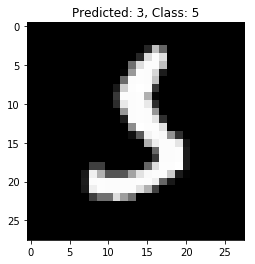

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
i = incorrect_indices[3]

plt.imshow(X_test[i], cmap='gray')
plt.title("Predicted: {}, Class: {}".format(y_pred_class[i], y_test_class[i]))
plt.show()